
# Data Augmentation 📷

Integrantes:
- David Leon Céspedes -172846
- Paulina Gómez Olvera Carpinteyro - 177523
- Juan Pablo Rosas Pineda - 177134

In [268]:
# Librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

Las transformaciones a implementar son:
- Rotación libre en unos grados definidos
- Escalamiento Uniforme de la imagen
- Esclamiento Anisotrópico de la imagen
- Traslación de la imagen en dimensiones definidas
- Espejo de la imagen en x
- Espejo de la imagen en y
- Mostrar la imagen en escala de grises

Aquí se definieron las transformaciones:

In [269]:
def rotate_image(img_rgb, angle=30):
    """Rotación con ajuste de tamaño"""
    h, w = img_rgb.shape[:2]
    center = (w // 2, h // 2)

    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    cos, sin = abs(M[0,0]), abs(M[0,1])

    new_w = int((h * sin) + (w * cos))
    new_h = int((h * cos) + (w * sin))

    M[0,2] += (new_w / 2.0) - center[0]
    M[1,2] += (new_h / 2.0) - center[1]

    rot = cv2.warpAffine(img_rgb, M, (new_w, new_h),
                         flags=cv2.INTER_LINEAR,
                         borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return rot, f"Rotación {angle}°"


def scale_uniform(img_rgb, factor=1.5):
    scaled = cv2.resize(img_rgb, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)
    return scaled, f"Escalamiento uniforme a=b={factor}"


def scale_anisotropic(img_rgb, fx=1.5, fy=0.75):
    scaled = cv2.resize(img_rgb, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled, f"Escalamiento anisotrópico fx={fx}, fy={fy}"


def translate(img_rgb, tx=60, ty=40):
    h, w = img_rgb.shape[:2]
    M = np.float32([[1, 0, tx],
                    [0, 1, ty]])
    shifted = cv2.warpAffine(img_rgb, M, (w, h),
                             flags=cv2.INTER_LINEAR,
                             borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return shifted, f"Traslación ({tx}, {ty})"


def mirror_y(img_rgb):
    """Espejo alrededor del eje Y (horizontal)"""
    h, w = img_rgb.shape[:2]
    cx = w // 2
    tx_y = 2.0 * cx
    Ry = np.float32([[-1, 0, tx_y],
                     [ 0, 1, 0]])
    mirrored = cv2.warpAffine(img_rgb, Ry, (w, h), flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return mirrored, "Espejo en Y"


def mirror_x(img_rgb):
    """Espejo alrededor del eje X (vertical)"""
    h, w = img_rgb.shape[:2]
    cy = h // 2
    ty_x = 2.0 * cy
    Rx = np.float32([[1, 0, 0],
                     [0, -1, ty_x]])
    mirrored = cv2.warpAffine(img_rgb, Rx, (w, h), flags=cv2.INTER_LINEAR,
                              borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
    return mirrored, "Espejo en X"

def to_gray(img_rgb):
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    return gray, "Escala de grises"


# Lista de funciones a aplicar (elige 1 o varias por imagen)
transformations = [
    rotate_image,
    scale_uniform,
    scale_anisotropic,
    translate,
    mirror_y,
    mirror_x,
    to_gray
]

Se deben de cargar las direcciones de las fotos a modificar:

In [270]:
img_1 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba1.jpg")
img_2 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba2.jpg")
img_3 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba3.jpg")
img_4 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba4.jpg")
img_5 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba5.jpg")
img_6 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba6.jpg")
img_7 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba7.jpg")
img_8 = cv2.imread(r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Prueba8.jpg")

En este caso, se decidió crear automáticamente una carpeta en dónde se descarguen las imagenes modificadas después de pasar por múltiples filtros (de 1 a 3)

In [271]:
output_folder = r"C:\Users\pauli\Downloads\Vision\Vision_en_Robotica\Mini_Proyecto_1\Modificadas"
os.makedirs(output_folder, exist_ok=True)  # crea la carpeta si no existe

# Lista de imágenes y nombres
images = [
    (img_1, "Prueba1"),
    (img_2, "Prueba2"),
    (img_3, "Prueba3"),
    (img_4, "Prueba4"),
    (img_5, "Prueba5"),
    (img_6, "Prueba6"),
    (img_7, "Prueba7"),
    (img_8, "Prueba8"),
]


Para hacer las transformaciones aleatorias y guardar en una carpeta generada las fotos modificadas:

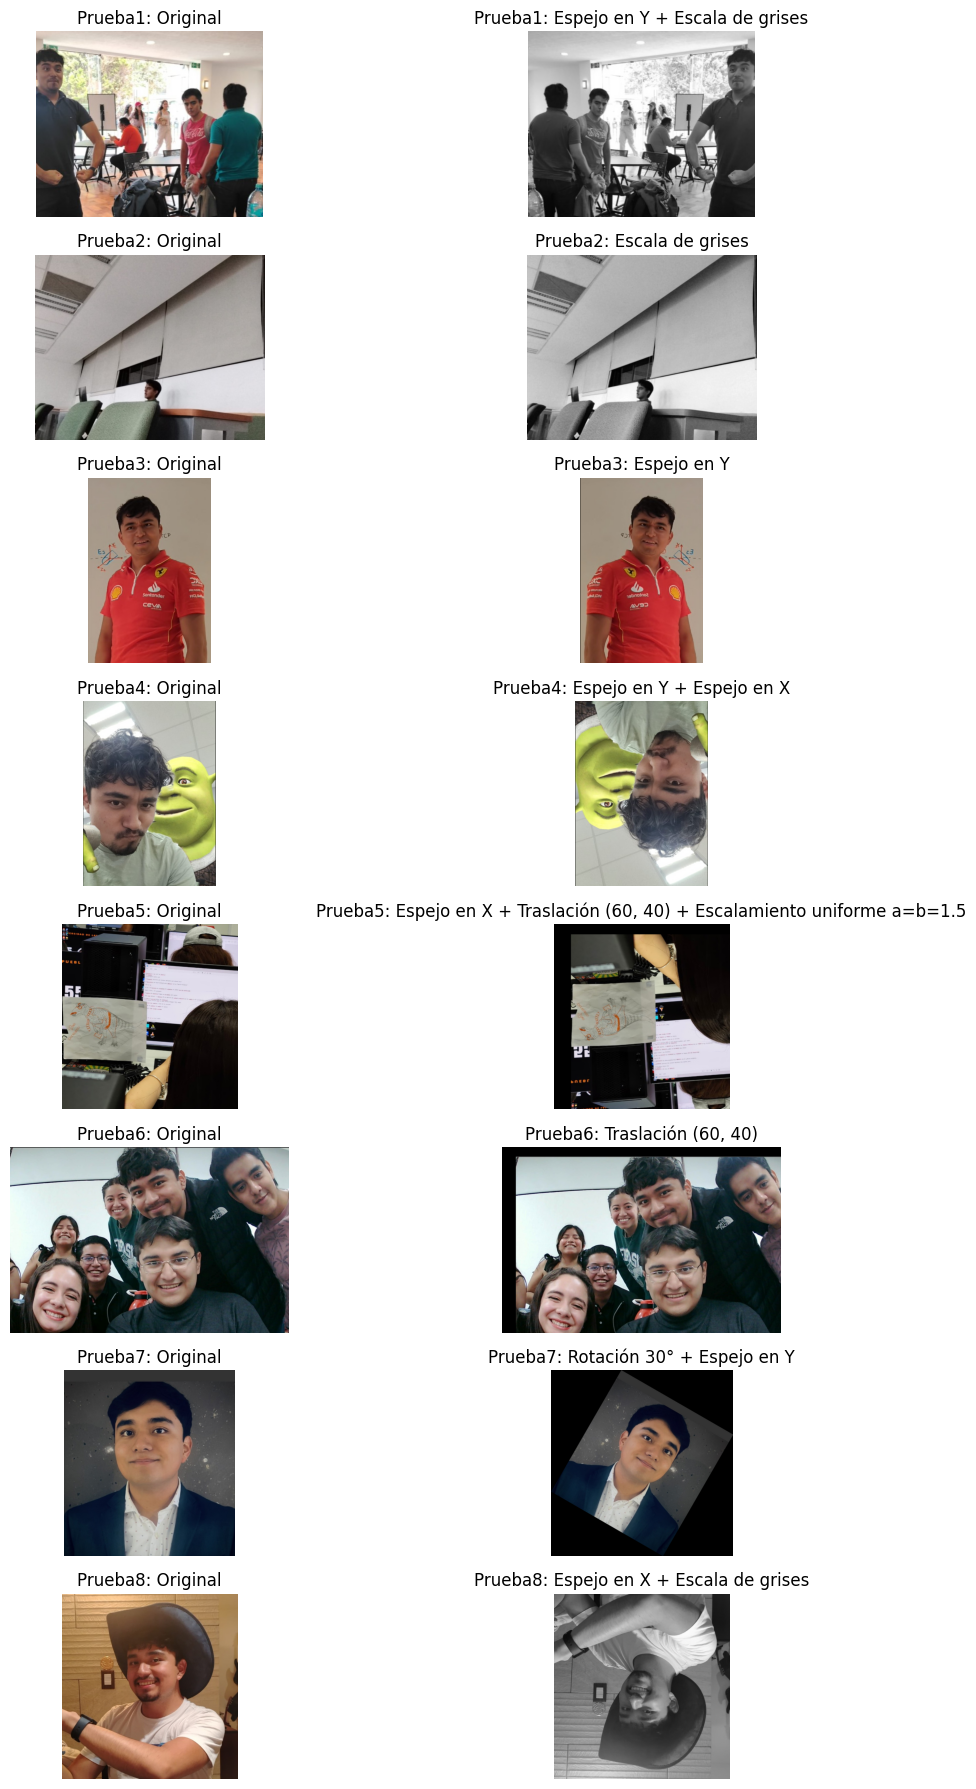

In [272]:
# Procesar cada imagen
results = []

for idx, (img_bgr, name) in enumerate(images, start=1):
    if img_bgr is None:
        raise FileNotFoundError(f"⚠️ No se pudo cargar la imagen: {name}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Seleccionar entre 1 y 3 transformaciones aleatorias
    num_trans = random.randint(1, 3)  
    chosen = random.sample(transformations, num_trans)

    img_mod = img_rgb.copy()
    applied_names = []
    for func in chosen:
        img_mod, t_name = func(img_mod)
        applied_names.append(t_name)

    # Guardar la imagen modificada con nombre único
    output_path = os.path.join(output_folder, f"{name}_mod.jpg")
    cv2.imwrite(output_path, cv2.cvtColor(img_mod, cv2.COLOR_RGB2BGR))

    results.append((idx, img_rgb, img_mod, applied_names, name, output_path))

# --- 🔹 Mostrar resultados ---
plt.figure(figsize=(12, 18))
for i, (idx, original, modified, applied_names, name, path) in enumerate(results):
    # Imagen original
    plt.subplot(8, 2, 2*i + 1)
    plt.imshow(original)
    plt.title(f"{name}: Original")
    plt.axis("off")

    # Imagen modificada
    plt.subplot(8, 2, 2*i + 2)
    cmap = "gray" if len(modified.shape) == 2 else None
    plt.imshow(modified, cmap=cmap)
    plt.title(f"{name}: {' + '.join(applied_names)}")
    plt.axis("off")

plt.tight_layout()
plt.show()
